# 1. Loading Data

In [47]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [74]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. Variable Descriptions

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
df_train["Pclass"] = df_train["Pclass"].astype(object)

Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket

Numerical Variable: PassengerId, Age, SibSp, Parch, Fare

# 3. Missing Values

In [78]:
print("Rows and Columns:", df_train.shape)
print("NA's:")
print(df_train.isna().sum())

Rows and Columns: (891, 12)
NA's:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 3.1. Age

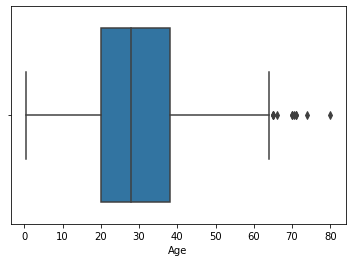

In [6]:
sns.boxplot(x=df_train['Age'])

Fill in NA values of Age with mean

In [7]:
df_train['Age'] = round(df_train['Age'])
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train['Age'] = df_train.Age.astype(int)

### 3.2. Cabin

Drop variable 'Cabin' because it has more than 75% of NA values

In [8]:
df_train = df_train.drop(['Cabin'], 1)

### Embarked

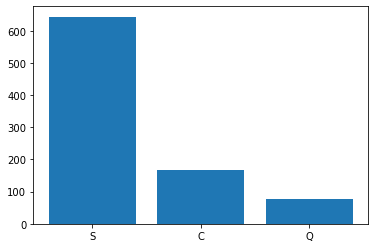

In [9]:
Count_Emb = df_train['Embarked'].value_counts()

plt.bar(Count_Emb.index, Count_Emb)
plt.show()

Replace 'Embarked' NAs with the majority class

In [10]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

# 4. Correlation between features

In [11]:
df_train.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,0.033639,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.067480,-0.035322,0.081629,0.257307
Age,0.033639,-0.067480,1.000000,-0.232794,-0.176439,0.093900
SibSp,-0.057527,-0.035322,-0.232794,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,-0.176439,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.093900,0.159651,0.216225,1.000000


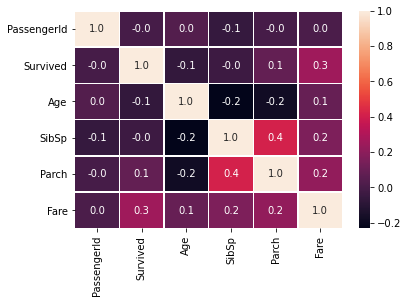

In [12]:
sns.heatmap(df_train.corr(), annot=True, linewidths =.5, fmt ='.1f')
plt.show()

The highest correlation is between Parch/SibSp with 0.4 and Fare/Survived with 0.3

# 5. Feature Engineering

### 5.1. Sex

Replace male class by 1 and female class by 0

In [13]:
df_train['Sex'] = df_train['Sex'].replace({'male':1, 'female':0})
df_train['Sex'] = df_train.Sex.astype(object)

df_train = pd.get_dummies(df_train, columns = ["Sex"])

In [14]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_0,Sex_1
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,S,0,1


### 5.2. Age

Turning 'Age' into categories

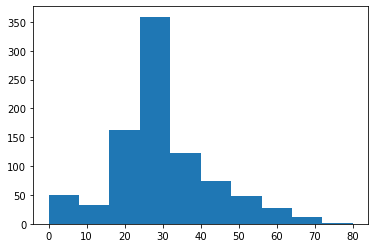

In [15]:
plt.hist(df_train['Age'])
plt.show()

In [16]:
bins= [0, 10, 18, 30, 60, 120]
labels = ['Child','Teen','Young Adult','Adult','Old']

df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=bins, labels=labels, right=False)

In [17]:
df_train = df_train.drop(['Age'], axis=1)
df_train = pd.get_dummies(df_train, columns = ["AgeGroup"])

In [18]:
df_train.head()

,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Embarked,Sex_0,Sex_1,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Old
0,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,S,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C,1,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,S,1,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,S,0,1,0,0,0,1,0


### 5.3. Pclass

In [19]:
df_train = pd.get_dummies(df_train, columns = ["Pclass"])

In [20]:
df_train.head()

,PassengerId,Survived,Name,SibSp,Parch,Ticket,Fare,Embarked,Sex_0,Sex_1,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Old,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,S,0,1,0,0,1,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C,1,0,0,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,S,1,0,0,0,0,1,0,1,0,0
4,5,0,"Allen, Mr. William Henry",0,0,373450,8.0500,S,0,1,0,0,0,1,0,0,0,1


### 5.4. SibSp and Parch

Create new variable 'Family' by adding up the variables 'SibSp' and 'Parch'

In [21]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1

In [22]:
df_train = df_train.drop(['SibSp', 'Parch'], axis=1)

In [23]:
df_train.head()

,PassengerId,Survived,Name,Ticket,Fare,Embarked,Sex_0,Sex_1,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Old,Pclass_1,Pclass_2,Pclass_3,Family
0,1,0,"Braund, Mr. Owen Harris",A/5 21171,7.2500,S,0,1,0,0,1,0,0,0,0,1,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C,1,0,0,0,0,1,0,1,0,0,2
2,3,1,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,S,1,0,0,0,1,0,0,0,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,S,1,0,0,0,0,1,0,1,0,0,2
4,5,0,"Allen, Mr. William Henry",373450,8.0500,S,0,1,0,0,0,1,0,0,0,1,1


### 5.5. Embarked

In [24]:
df_train = pd.get_dummies(df_train, columns = ["Embarked"])

In [25]:
df_train.head()

,PassengerId,Survived,Name,Ticket,Fare,Sex_0,Sex_1,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Old,Pclass_1,Pclass_2,Pclass_3,Family,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",A/5 21171,7.2500,0,1,0,0,1,0,0,0,0,1,2,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,1,0,0,0,0,1,0,1,0,0,2,1,0,0
2,3,1,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,0,0,1,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,1,0,0,0,0,1,0,1,0,0,2,0,0,1
4,5,0,"Allen, Mr. William Henry",373450,8.0500,0,1,0,0,0,1,0,0,0,1,1,0,0,1


### 5.6. Dropping PassengerId, Name and Ticket

In [27]:
df_train = df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

### 5.7. Final Dataset

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PassengerId           891 non-null    int64  
 1   Survived              891 non-null    int64  
 2   Name                  891 non-null    object 
 3   Ticket                891 non-null    object 
 4   Fare                  891 non-null    float64
 5   Sex_0                 891 non-null    uint8  
 6   Sex_1                 891 non-null    uint8  
 7   AgeGroup_Child        891 non-null    uint8  
 8   AgeGroup_Teen         891 non-null    uint8  
 9   AgeGroup_Young Adult  891 non-null    uint8  
 10  AgeGroup_Adult        891 non-null    uint8  
 11  AgeGroup_Old          891 non-null    uint8  
 12  Pclass_1              891 non-null    uint8  
 13  Pclass_2              891 non-null    uint8  
 14  Pclass_3              891 non-null    uint8  
 15  Family                8

In [28]:
df_train.head()

,Survived,Fare,Sex_0,Sex_1,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Old,Pclass_1,Pclass_2,Pclass_3,Family,Embarked_C,Embarked_Q,Embarked_S
0,0,7.2500,0,1,0,0,1,0,0,0,0,1,2,0,0,1
1,1,71.2833,1,0,0,0,0,1,0,1,0,0,2,1,0,0
2,1,7.9250,1,0,0,0,1,0,0,0,0,1,1,0,0,1
3,1,53.1000,1,0,0,0,0,1,0,1,0,0,2,0,0,1
4,0,8.0500,0,1,0,0,0,1,0,0,0,1,1,0,0,1


# 6. Modelling

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [30]:
X = df_train.drop(['Survived'], 1)
y = df_train['Survived']

Split the dataset into training and testing set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Standardization of all features

In [32]:
scale = StandardScaler().fit(X_train)
    
# transform the training data column
X_train = scale.transform(X_train)
    
# transform the testing data column
X_test = scale.transform(X_test)

Test 5 models to see which one performs best

In [33]:
classifier = [DecisionTreeClassifier(random_state = 0),
              RandomForestClassifier(random_state = 0),
              SVC(random_state = 0),
              MLPClassifier(random_state = 0),
              xgb.XGBClassifier(random_state = 0)]


train_results = []
test_results = []

In [34]:
for i in range(len(classifier)): 
    clf = classifier[i]
    clf.fit(X_train, y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    acc_train = accuracy_score(y_train, pred_train)
    acc_test = accuracy_score(y_test, pred_test)
    train_results.append(acc_train)
    test_results.append(acc_test)

[14:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jo_em\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\jo_em\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [35]:
train_results

#DTree
#RForest
#SVC
#NN
#XGBoost

[0.9396067415730337,
 0.9382022471910112,
 0.8455056179775281,
 0.848314606741573,
 0.9269662921348315]

In [36]:
test_results

#DTree
#RForest
#SVC
#NN
#XGBoost

[0.8491620111731844,
 0.8715083798882681,
 0.8435754189944135,
 0.8268156424581006,
 0.8659217877094972]

### Results (accuracy):
* DT = 0.8491620111731844
* RF = 0.8715083798882681
* SVC = 0.8435754189944135
* NN = 0.8268156424581006
* XGB = 0.8659217877094972

## 6.1. Hyperparameter Tuning

Hyperparameter tuning on the 2 best models chosen above, Random Forest and XGBoost

### Random Forest

In [37]:
rf = RandomForestClassifier(random_state = 0)

rf_param_grid = {'criterion': ['gini', 'entropy'],
                 'n_estimators': range(0, 200, 50),
                 'max_depth': [None, 1, 5, 10, 15, 20, 30, 40],
                 'min_samples_split' : [None, 2, 5, 10, 30],
                 'min_samples_leaf' : [None, 1, 5, 10, 30]}

rf = GridSearchCV(rf, rf_param_grid, scoring="accuracy", n_jobs=-1, verbose=1)
rf.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 891 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 2450 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 3464 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4624 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6024 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 7594 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:  3.0min finished


GridSearchCV(estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 5, 10, 15, 20, 30, 40],
                         'min_samples_leaf': [None, 1, 5, 10, 30],
                         'min_samples_split': [None, 2, 5, 10, 30],
                         'n_estimators': range(0, 200, 50)},
             scoring='accuracy', verbose=1)

In [38]:
rf.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=150,
                       random_state=0)

In [39]:
rf.best_score_

0.8300009849305624

* Accuracy = 0.8300009849305624

### XGBoost

In [40]:
xgb = xgb.XGBClassifier(random_state = 0)

xgb_param_grid = {'max_depth': [None, 1, 3, 5, 10],
                  'min_child_weight': [0.0001, 0.001, 0.01, 0.1],
                  'gamma': np.arange(0.0, 40.0, 10.0),
                  'learning_rate': np.arange(0, 0.5, 0.05),
                  'colsample_bylevel': np.round(np.arange(0, 2, 0.5)),
                  'colsample_bytree': np.arange(0, 2, 0.5)}

xgb = GridSearchCV(xgb, xgb_param_grid, scoring="accuracy", n_jobs=-1, verbose=1)
xgb.fit(X_train, y_train)

Fitting 5 folds for each of 12800 candidates, totalling 64000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

[15:01:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jo_em\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None...
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bylevel': array([0., 0., 1., 2.]),
                         'colsample_bytree': array([0. , 0.5, 1. , 

In [41]:
xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.0,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.35000000000000003, max_delta_step=0, max_depth=5,
              min_child_weight=0.1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
xgb.best_score_

0.8342164877376146

* Accuracy = 0.8342164877376146

# 6.2. Feature Importance

Analyze the feature importance in the xgboost model

In [50]:
features = list(X.columns)

# perform permutation importance
results = permutation_importance(xgb, X_train, y_train, scoring='accuracy', random_state=0)

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('%0d %s / Score: %.5f' % (i, features[i], v))

0 Fare / Score: 0.03596
1 Sex_0 / Score: 0.03596
2 Sex_1 / Score: 0.10702
3 AgeGroup_Child / Score: 0.05169
4 AgeGroup_Teen / Score: 0.01096
5 AgeGroup_Young Adult / Score: 0.01067
6 AgeGroup_Adult / Score: 0.02051
7 AgeGroup_Old / Score: 0.00056
8 Pclass_1 / Score: 0.01320
9 Pclass_2 / Score: 0.01348
10 Pclass_3 / Score: 0.02472
11 Family / Score: 0.02809
12 Embarked_C / Score: 0.00225
13 Embarked_Q / Score: 0.00478
14 Embarked_S / Score: 0.00730


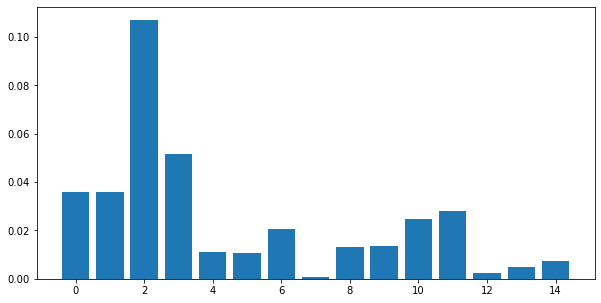

In [51]:
# plot feature importance
figure(figsize=(10,5))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## 6.2.1. Iteration with most importante features

Select the most important features and run the model one last time to see if it has improved performance

In [68]:
#Select all features with score > 'See graph above to select threshold'
features = list(X.columns)
df_fi = []
for i,v in enumerate(importance):
    if v > 0.01: #threshold selected
        df_fi.append(features[i])
        
df_fi.append('Survived')
df_fi

['Fare', 'Sex_0', 'Sex_1', 'AgeGroup_Child', 'Survived']

In [69]:
df_train_fi = df_train[df_fi]
df_train_fi

,Fare,Sex_0,Sex_1,AgeGroup_Child,Survived
0,7.2500,0,1,0,0
1,71.2833,1,0,0,1
2,7.9250,1,0,0,1
3,53.1000,1,0,0,1
4,8.0500,0,1,0,0
...,...,...,...,...,...
886,13.0000,0,1,0,0
887,30.0000,1,0,0,1
888,23.4500,1,0,0,0
889,30.0000,0,1,0,1


In [70]:
X_fi = df_train_fi.iloc[:,0:-1]
y_fi = df_train_fi.iloc[:,-1]

X_train_fi, X_test_fi, y_train_fi, y_test_fi = train_test_split(X_fi, y_fi, test_size=0.2, random_state=0) 

In [71]:
xgb.fit(X_train_fi, y_train_fi)
y_pred_fi = list(xgb.predict(X_test_fi))

Fitting 5 folds for each of 12800 candidates, totalling 64000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 12064 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 17216 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 18466 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 19816 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 21266 tasks  

[17:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jo_em\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [72]:
xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.35000000000000003, max_delta_step=0, max_depth=10,
              min_child_weight=0.0001, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
xgb.best_score_

0.813158672313602

### Result
* Accuracy = 0.8440460947503201